# Grouped Box Plot for RAD51B only

In [1]:
%matplotlib inline

import json
import urllib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Polygon
from scipy import stats

import dataParser as parser
import helperFiles.buildPlot as plotBuilder

Load in CSV file data

In [2]:
df = pd.read_csv('../merged_1.6.1.csv')

In [3]:
data = []
labels = []
inputs = ['RAD51B']


Retrieve data

In [4]:
affected = []
notaffected = []
for gene in inputs:
    print(gene)
    all_donors = df['donor_unique_id'].unique()
    donorsInGene = parser.getDonors(gene)
    diffDonors = parser.diff(all_donors, donorsInGene)

    affected = []
    notaffected = []

    for donor in donorsInGene:
        donorDF = df[(df['donor_unique_id'] == donor)]
        affected.append(len(donorDF.index))

    for donor in diffDonors:
        donorDF = df[(df['donor_unique_id'] == donor)]
        notaffected.append(len(donorDF.index))

    data.append(notaffected)
    data.append(affected)
    labels.append("Regular " + gene)
    labels.append(gene)


RAD51B


[Text(0, 0, 'Regular RAD51B'), Text(0, 0, 'RAD51B')]

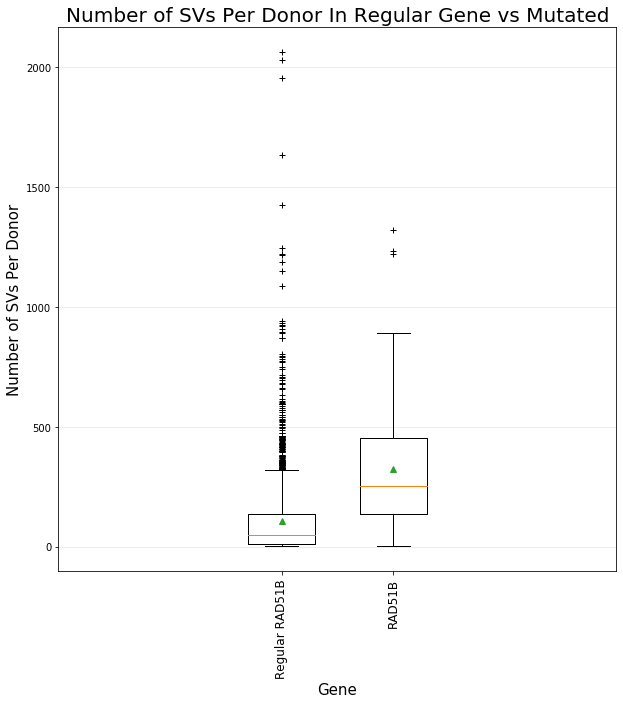

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 10))

bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5, showmeans=True, positions = [1, 1.25])

plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title(
    'Number of SVs Per Donor In Regular Gene vs Mutated', fontsize=20)
ax1.set_xlabel('Gene', fontsize=15)
ax1.set_ylabel('Number of SVs Per Donor', fontsize=15)

ax1.set_xticklabels(labels,
                    rotation=90, fontsize=12)


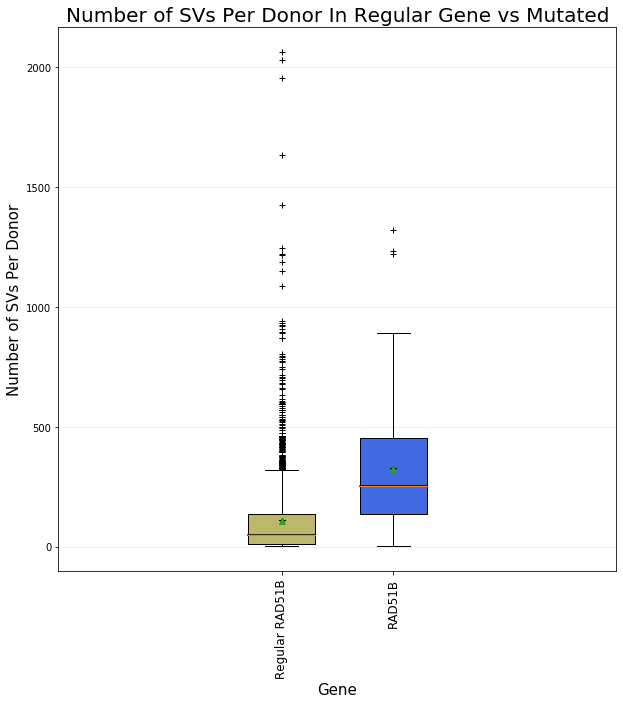

In [6]:
box_colors = ['darkkhaki', 'royalblue']
num_boxes = len(data)
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    box_coords = np.column_stack([boxX, boxY])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        ax1.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
             color='w', marker='*', markeredgecolor='k')
fig

2.085113142152007e-42


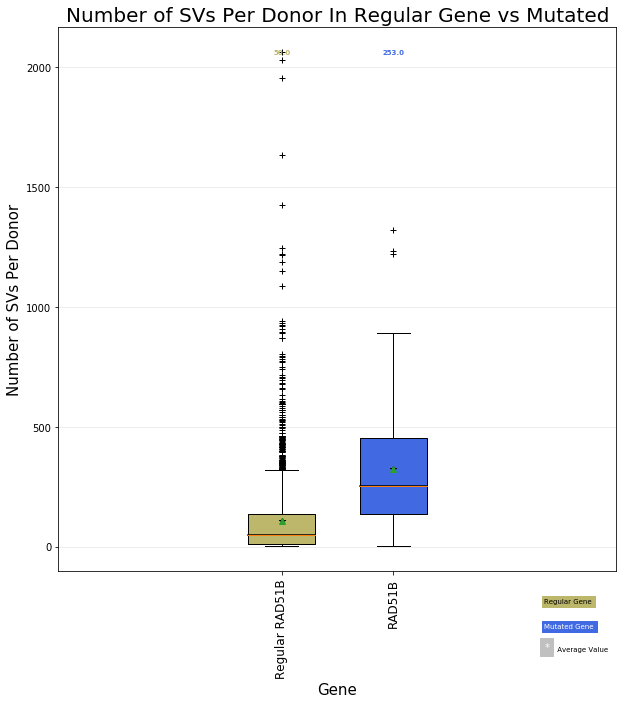

In [7]:
pos = np.arange(num_boxes, step=.25) + 1
upper_labels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], .95, upper_labels[tick],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[k], color=box_colors[k])

# Finally, add a basic legend
fig.text(0.80, 0.08, f'Regular Gene',
         backgroundcolor=box_colors[0], color='black', weight='roman',
         size='x-small')
fig.text(0.80, 0.045, 'Mutated Gene',
         backgroundcolor=box_colors[1],
         color='white', weight='roman', size='x-small')
fig.text(0.80, 0.015, '*', color='white', backgroundcolor='silver',
         weight='roman', size='medium')
fig.text(0.815, 0.013, ' Average Value', color='black', weight='roman',
         size='x-small')
print(stats.ttest_ind(affected, notaffected)[1])
fig
